# Finds optical events in a video file

### Imports

In [1]:
# Python standard library
import sys
import os

# Scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Program specific
PORE_STATS_BASE_DIRECTORY = os.getcwd().replace('notebooks', '')
sys.path.append(PORE_STATS_BASE_DIRECTORY + '/pore_stats/oi/')
import optical_imaging as oi
import oi_file

### Load data

In [2]:
# Define file path
data_base_path = '/home/prestonh/Desktop/Research/cancer_cells/data'
date = '/6-28-2017'
particle_type = '/PDMS_oil_0'
channel_type = '/20-50-20_0'
file_index = '2'
file_path = data_base_path + date + particle_type + channel_type + '/oi/bin/test_camera_' + file_index

# Set output file path
output_file_path = file_path + '_events.json'

# Open video
oi_vid = oi_file.Raw(file_path, 512, 288, 50000, 5)

In [4]:
250000*512*288

36864000000

### Find a frame that has a cluster

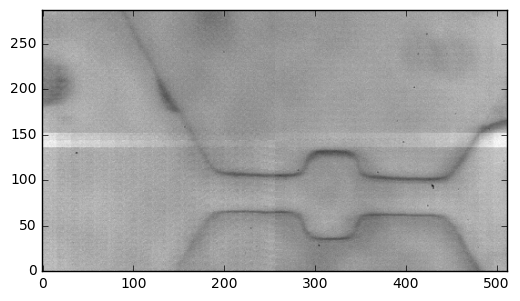

In [13]:
template_index = 0
template_frame = oi_vid.get_frame(template_index)
plt.imshow(template_frame, cmap = 'gray', origin = 'lower')
plt.show()

In [8]:
threshold_difference = 0.02

num_found = 0
for i in range(0, oi_vid._total_frames):
    if i%1000 == 0:
        print i
    frame = oi_vid.get_frame(i)
    clusters = oi.find_clusters_percentage_based(frame, template_frame, threshold_difference = threshold_difference)
    if(len(clusters)) > 0:
        print i
        num_found+=1
        if num_found > 100:
            break
            pass
            

0
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
288
289
290
291
292
293
294


### Show image, template image, difference

1


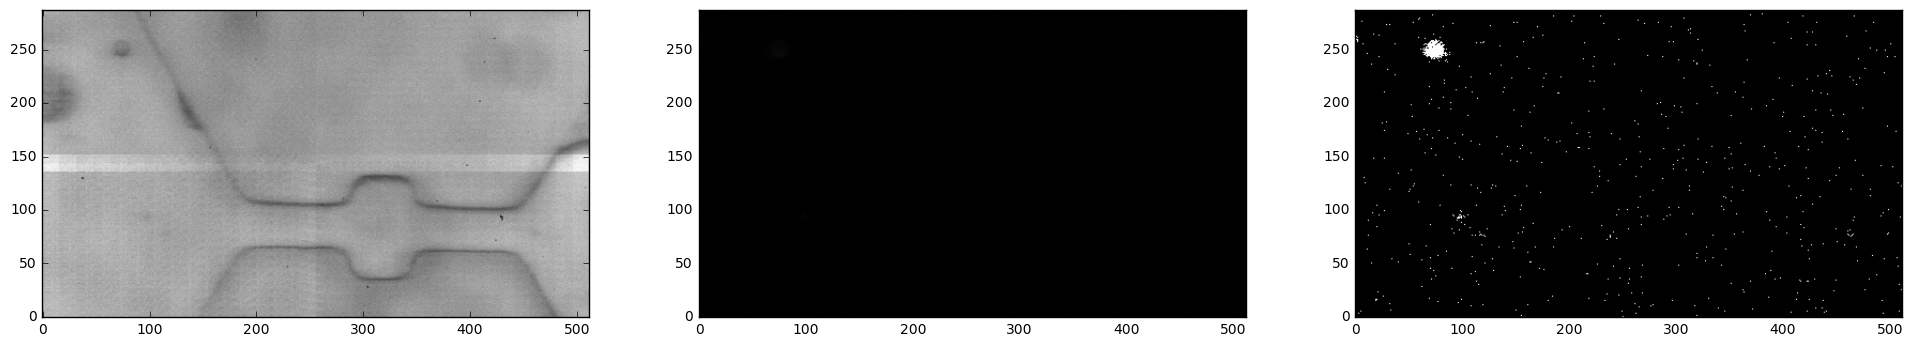

In [16]:
index = 150

template_frame = oi_vid.get_frame(template_index)
frame = oi_vid.get_frame(index)

threshold_difference = .015#.035
alpha = 1#2



beta = 'avg'    # -(np.mean(frame)-.5)
#template_frame = oi.change_frame_contrast(template_frame, alpha = alpha, beta = beta)
#frame = oi.change_frame_contrast(frame, alpha = alpha, beta = beta)


cluster_threshold = 200


neg_frame = abs(frame - template_frame)
clusters = oi.find_clusters_percentage_based(frame, template_frame, threshold_difference = threshold_difference,\
                                             cluster_threshold = cluster_threshold)
temp_neg_frame = np.copy(neg_frame)
temp_neg_frame[temp_neg_frame > threshold_difference] = 1
temp_neg_frame[temp_neg_frame <= threshold_difference] = 0

print len(clusters)
fig, axes = plt.subplots(1,3,figsize=(24,8))

# Raw image
plt.sca(axes[0])
plt.imshow(frame, cmap = 'gray', origin = 'lower')

# Negative
plt.sca(axes[1])
plt.imshow(neg_frame, cmap = 'gray', vmin = 0, vmax = 1, origin = 'lower')

# Thresholded negative
plt.sca(axes[2])
plt.imshow(temp_neg_frame, vmin = 0, vmax = 1, cmap = 'gray', origin = 'lower')

plt.show()

### Find events

In [17]:
reload(oi)
alpha = 1
beta = 'avg'
raw_events = oi.find_events(oi_vid, ti = 0, template_frame = oi_vid.get_frame(template_index), threshold_difference = threshold_difference, cluster_threshold = cluster_threshold, alpha = alpha, beta = 'avg')

/home/prestonh/Desktop/Research/pore_stats//pore_stats/oi/optical_imaging.py:1120: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template_frame == None:


t:  0 / 49974 	clusters: 0 	active: 0 	inactive: 0


/home/prestonh/Desktop/Research/pore_stats//pore_stats/oi/optical_imaging.py:62: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pixels != None:


t:  1000 / 49974 	clusters: 0 	active: 0 	inactive: 5
t:  2000 / 49974 	clusters: 0 	active: 0 	inactive: 7
t:  3000 / 49974 	clusters: 1 	active: 2 	inactive: 11
t:  4000 / 49974 	clusters: 0 	active: 1 	inactive: 17
t:  5000 / 49974 	clusters: 0 	active: 0 	inactive: 20
t:  6000 / 49974 	clusters: 0 	active: 0 	inactive: 23
t:  7000 / 49974 	clusters: 0 	active: 0 	inactive: 25
t:  8000 / 49974 	clusters: 0 	active: 0 	inactive: 31
t:  9000 / 49974 	clusters: 0 	active: 0 	inactive: 35
t:  10000 / 49974 	clusters: 0 	active: 0 	inactive: 39
t:  11000 / 49974 	clusters: 0 	active: 0 	inactive: 43
t:  12000 / 49974 	clusters: 0 	active: 0 	inactive: 45
t:  13000 / 49974 	clusters: 0 	active: 0 	inactive: 49
t:  14000 / 49974 	clusters: 0 	active: 0 	inactive: 52
t:  15000 / 49974 	clusters: 0 	active: 0 	inactive: 55
t:  16000 / 49974 	clusters: 0 	active: 1 	inactive: 59
t:  17000 / 49974 	clusters: 0 	active: 0 	inactive: 63
t:  18000 / 49974 	clusters: 0 	active: 0 	inactive: 67
t: 

### Inspect trajectories

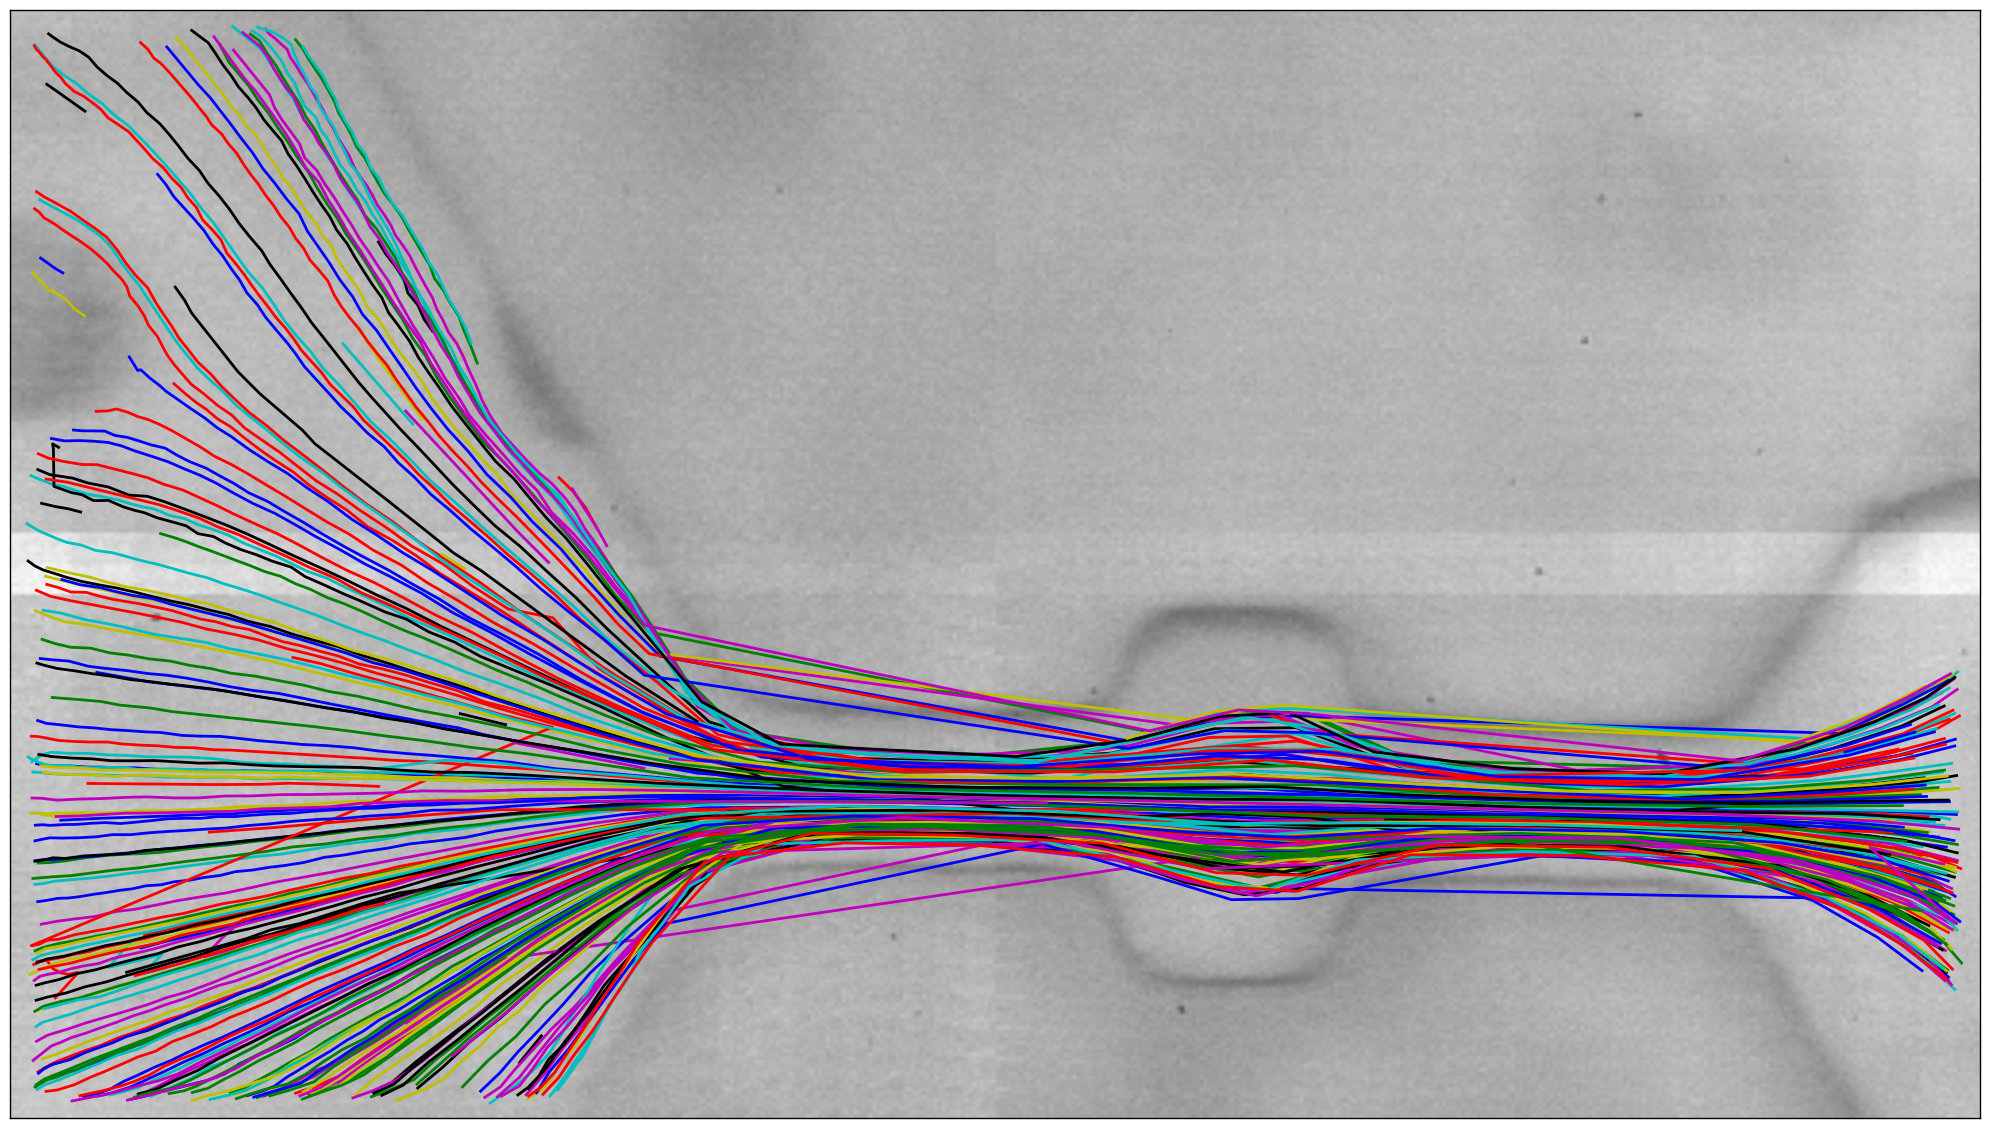

In [18]:
fig = plt.figure(figsize = (20,12))
for i, event in enumerate(raw_events[:]):
    px = []
    py = []
    for detection in event._detections:
        px.append(detection._px)
        py.append(detection._py)
    plt.plot(px, py, lw = 2)

plt.imshow(template_frame, alpha=0.8, cmap = 'gray', origin = 'lower')
plt.xticks([])
plt.yticks([])

fig.tight_layout()


plt.show()

### Save events

In [19]:
print output_file_path

/home/prestonh/Desktop/Research/cancer_cells/data/6-28-2017/PDMS_oil_0/20-50-20_0/oi/bin/test_camera_2_events.json


In [20]:
oi_file.save_oi_events_json(output_file_path, raw_events)